In [25]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/payutech/bankpersonalloan/master/Bank_Personal_Loan_Modelling.csv")

In [3]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### The problem:
Banks want to increase their customer base to bring in more load business. They want to convert liability-based customers to load customers. They need information about the connection between the variables given in the data.

### Visulizations

In [12]:
 data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [37]:
#correlation matrix
#drop ID and zip code
data1=data.drop(columns=['ID', 'ZIP Code'])
data1.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


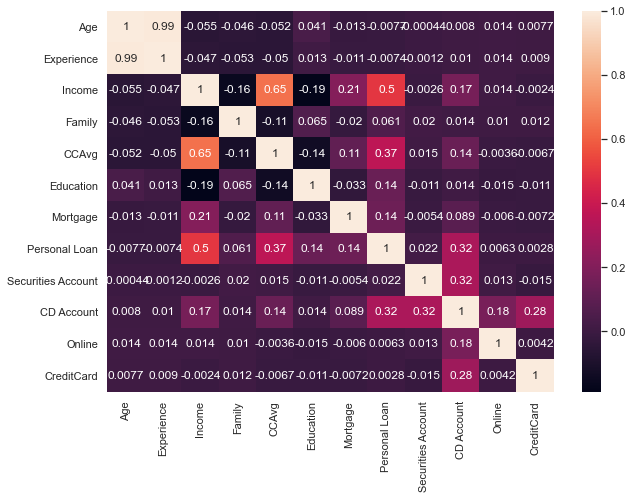

In [48]:
corr=data1.corr()
sns.set(rc={'figure.figsize':(10,7)})
sns.heatmap(corr, annot=True)
#Age is highly correlated with Experience

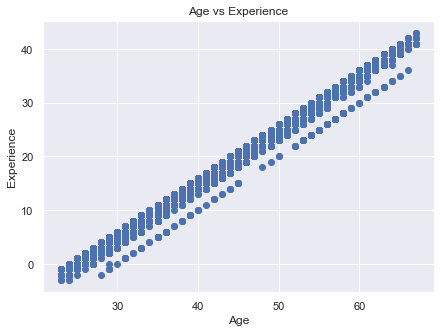

In [36]:
plt.figure(figsize=(7,5))
plt.scatter(data.Age, data.Experience)
plt.title('Age vs Experience')
plt.xlabel('Age')
plt.ylabel('Experience')
plt.show()

/Users/seline/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/seline/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/seline/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/seline/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/seline/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/seline/opt/anacond

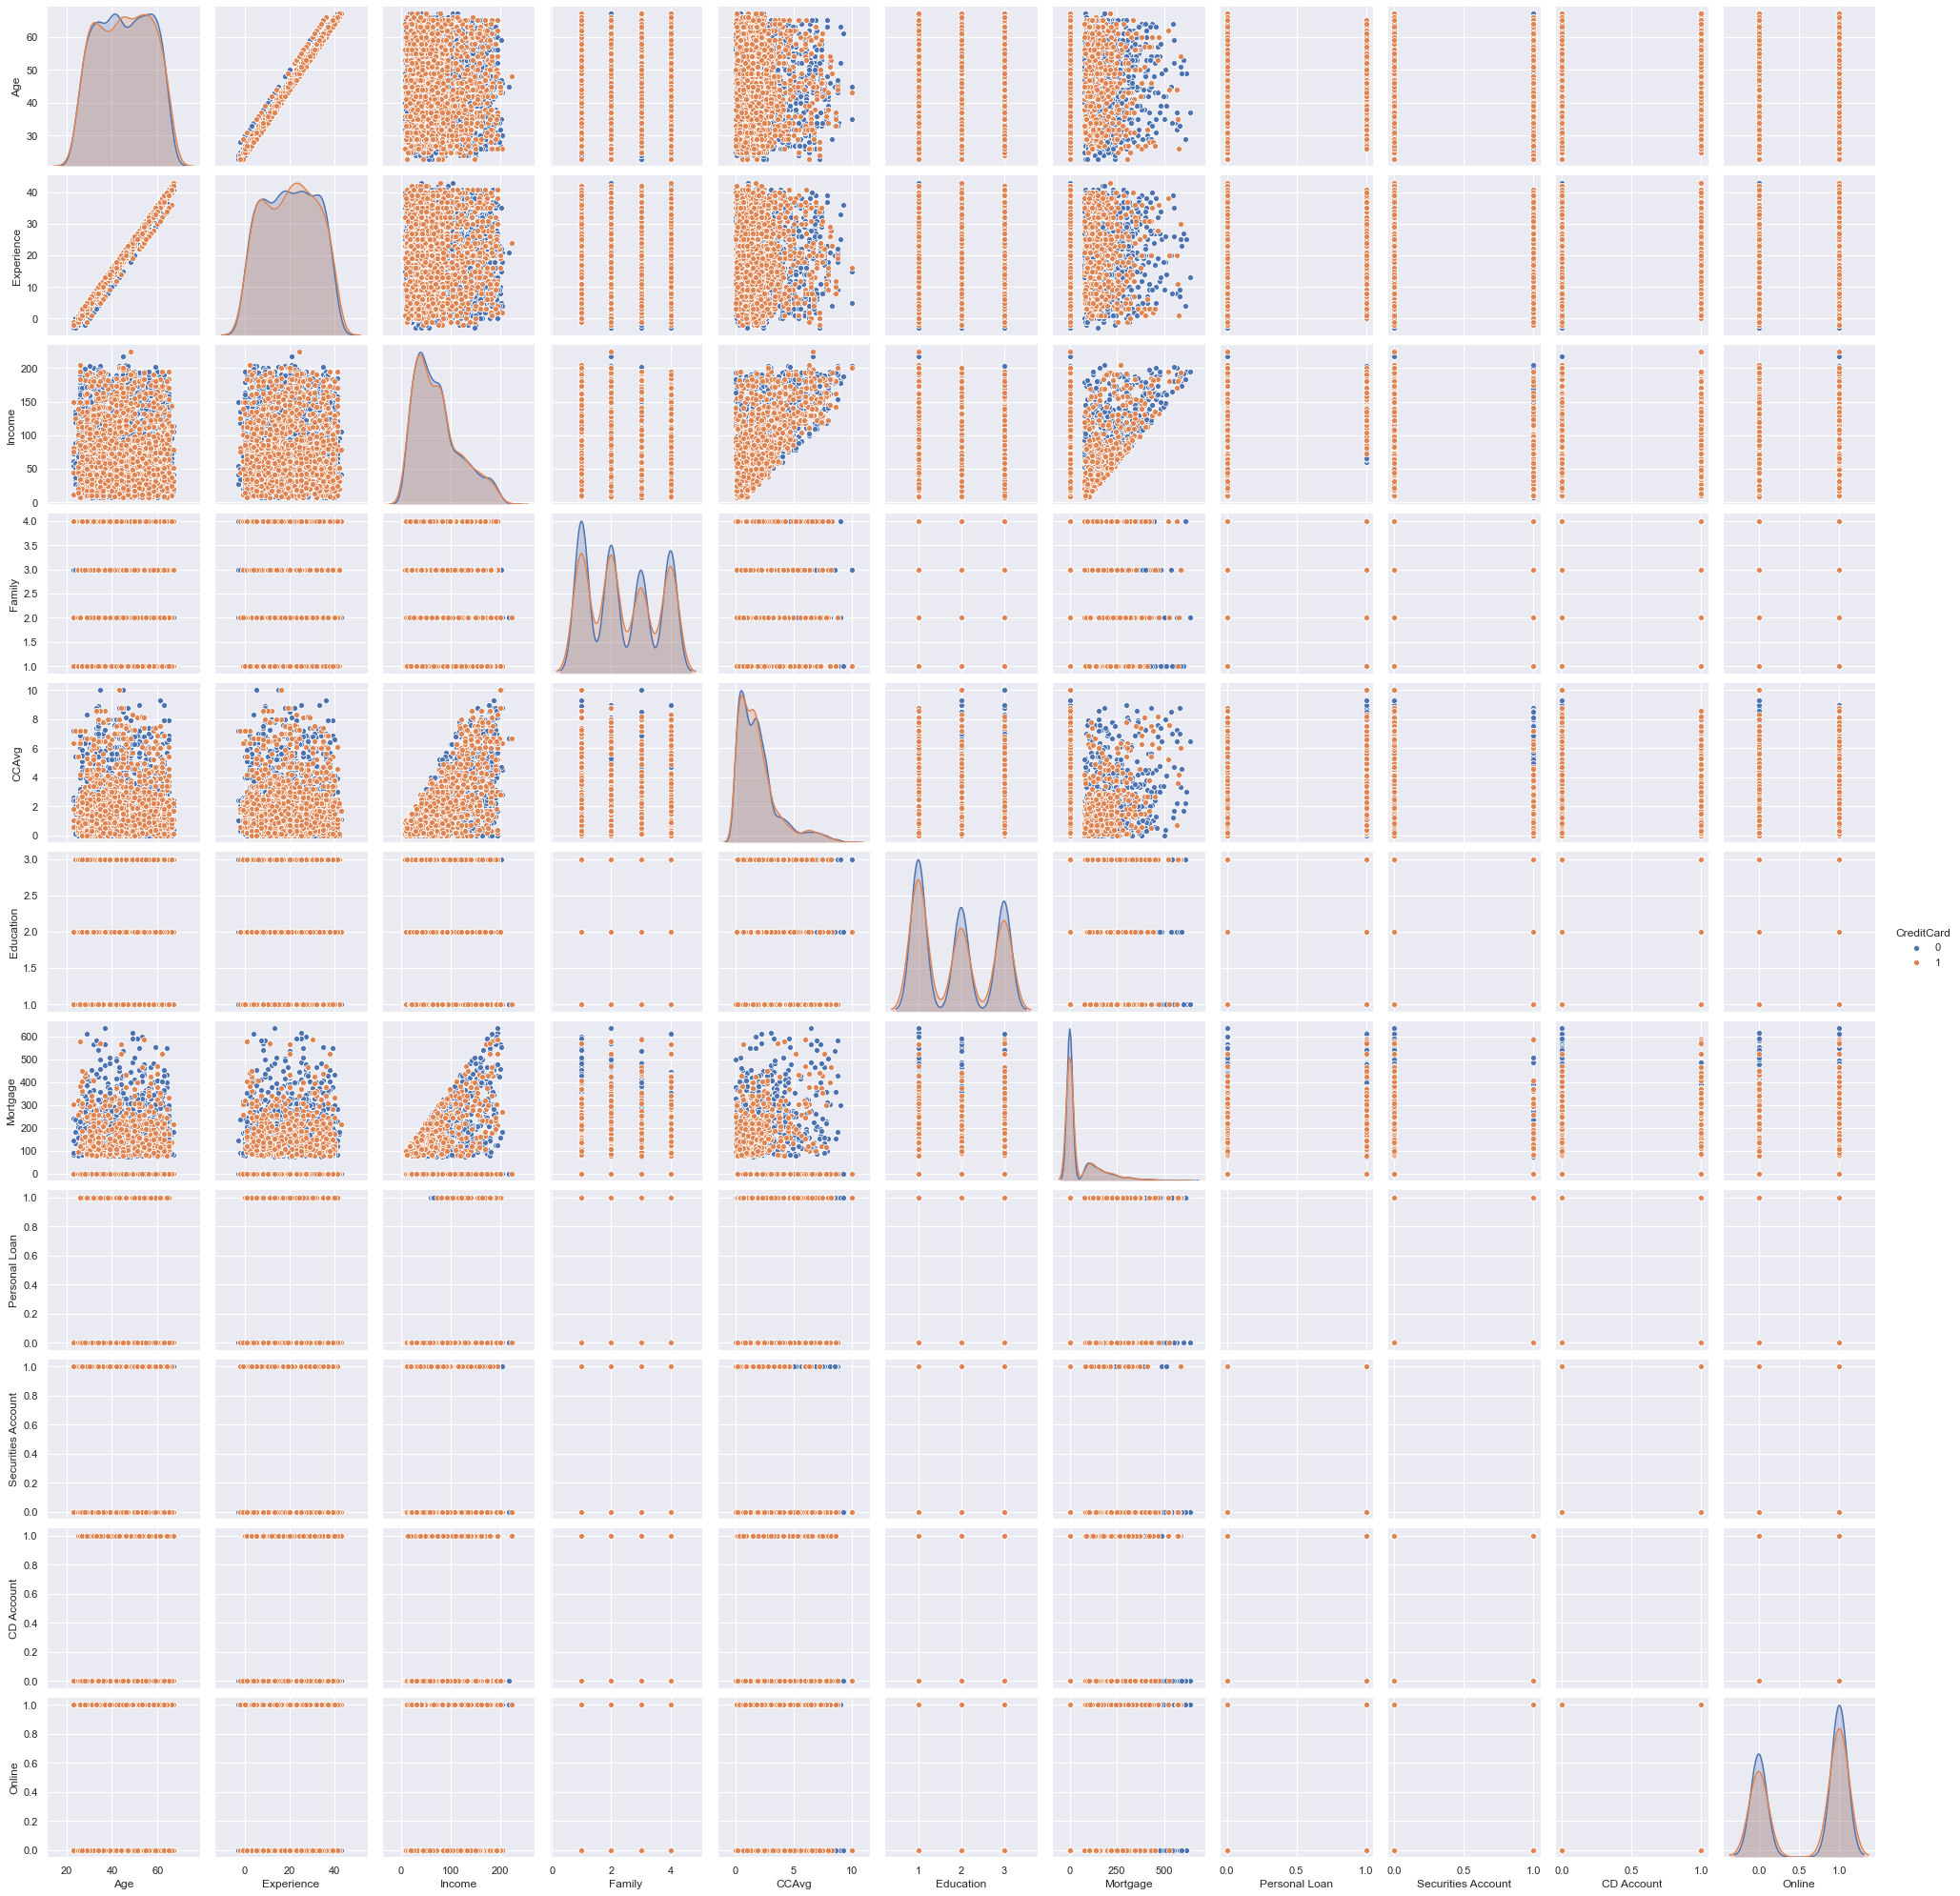

In [38]:
#let's visulize scatterplot matrix colored by CredicCard
sns.pairplot(data1,hue='CreditCard')

In [40]:
#there are lots of categorical data from the scatter plot matrix, let's remove those 
#plot numerical variables only
data2=data1[['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']]

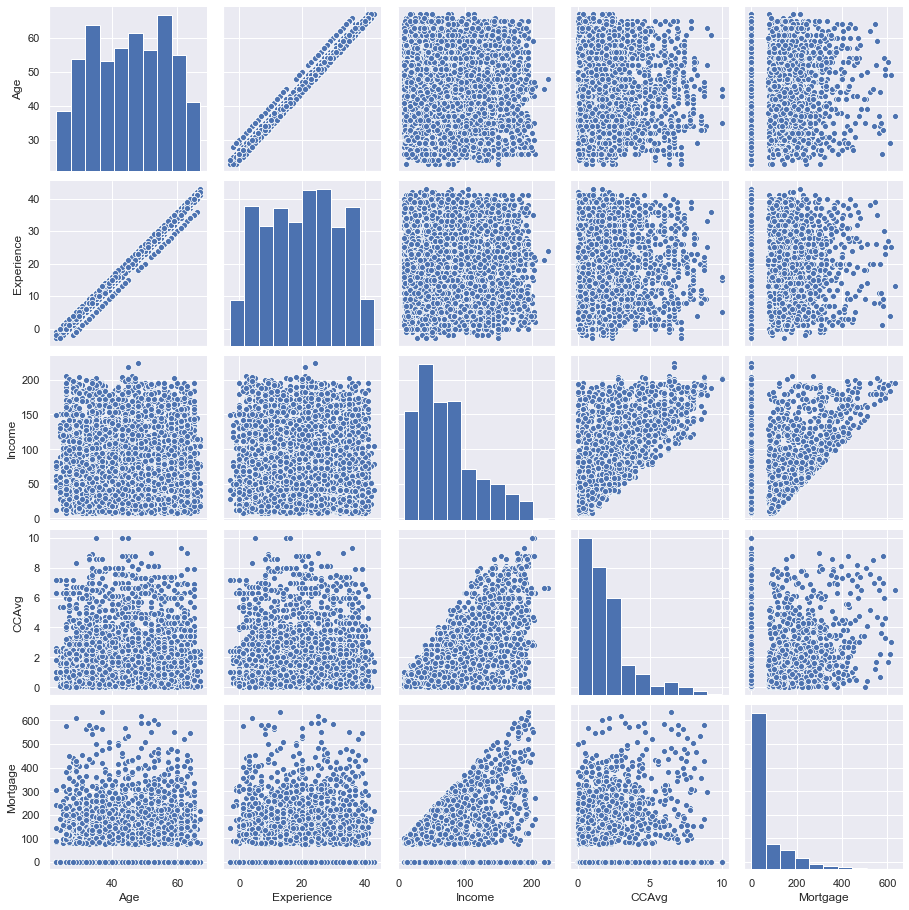

In [42]:
sns.pairplot(data2)

In [45]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

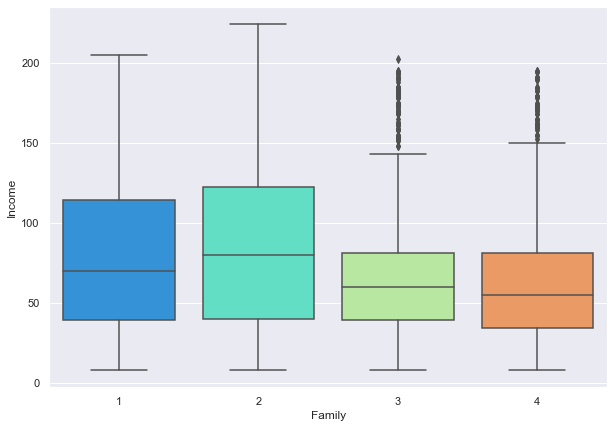

In [57]:
sns.boxplot(x='Family', y='Income', data=data, palette='rainbow')

Family=2 seems to have higher income, the median average of family=4 is relatively low

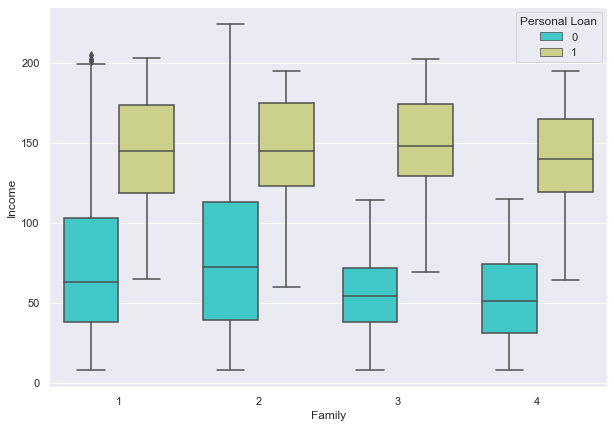

In [56]:
#adding personal loan see if there any difference 
sns.boxplot(x='Family', y='Income', data=data, palette='rainbow', hue='Personal Loan')

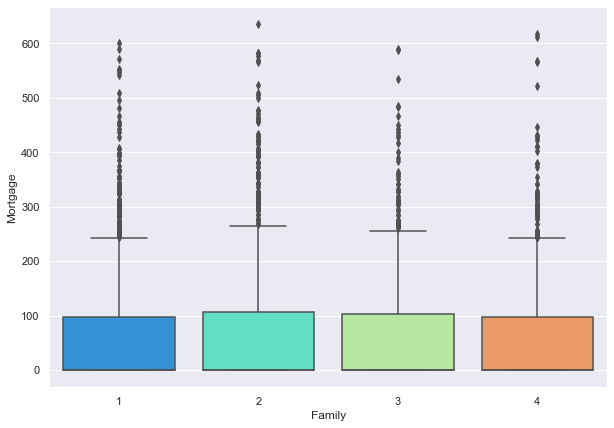

In [54]:
sns.boxplot(x='Family', y='Mortgage', data=data, palette='rainbow')

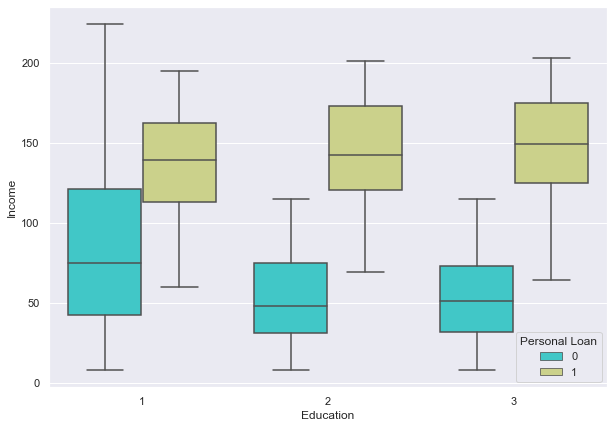

In [62]:
#Income vs Education 
sns.boxplot(x='Education', y='Income', data=data, palette='rainbow', hue='Personal Loan')

In [64]:
data_crosstab=pd.crosstab(data.Education, data.CreditCard, margins=False)
print(data_crosstab)

CreditCard     0    1
Education            
1           1463  633
2           1003  400
3           1064  437


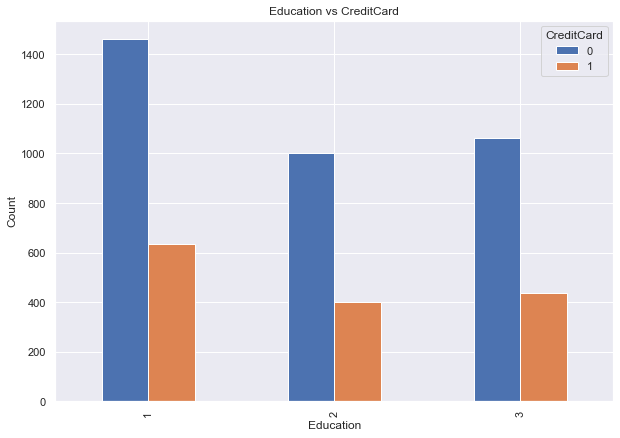

In [68]:
data_crosstab.plot.bar()
plt.title('Education vs CreditCard')
plt.ylabel('Count')
plt.show()

In [69]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')